# Data projections

In some cases, a trained MOFA model could be useful for projecting new data to the same factor space.

A naïve way to approach this would be through computing $Z^{'}$ using a pseudo-inverse matrix for weights $W$:

$$
Y \sim Z W^{T}
\\
Y {(W^{T})}^{-1} \sim Z W^{T} {(W^{T})}^{-1}
\\
Z \sim Y {(W^{T})}^{-1}
$$

and then for new data $Y^{'}$

$$
Z^{'} \sim Y^{'} {(W^{T})}^{-1}
$$

`mofax` implements this as in the `model.project_data()` method as well as in a plotting function `mofax.plot_projection()`.

Import libraries:

In [2]:
import numpy as np
import pandas as pd
import mofax as mfx

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load data:

In [3]:
model = mfx.mofa_model("data/models/pbmc10k.hdf5")

For this example, in order to demonstrate the interface, we will use a part of the training data for the projection:

In [4]:
x = model.data['rna']['group1'][()]

In [5]:
np.random.seed(1)
indices = np.sort(np.random.randint(0, x.shape[0], size=int(0.1 * x.shape[0])))

Project the data using some factors and plot it together:

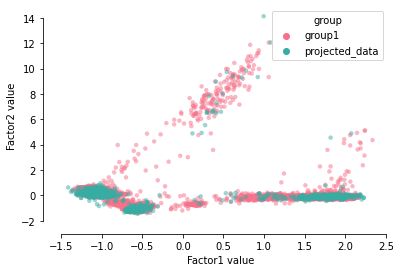

In [6]:
mfx.plot_projection(
    model,
    x[indices,:],     # data to project
    factors=range(5), # factor selection
    with_orig=True,   # plot data from the model as well
    legend=True,      
    alpha=0.5,        
    palette=sns.color_palette("husl", 2),
);

We can use all factors and plot two factors of choice:

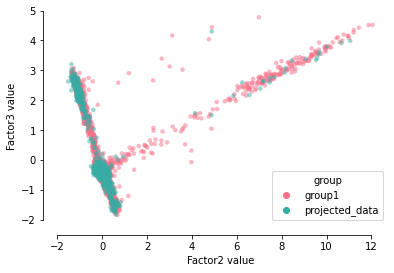

In [7]:
mfx.plot_projection(
    model,
    x[indices,:],     # data to project
                      # all factors used by default
    x=1, y=2,         # plot Factor2 and Factor3
    with_orig=True,   # plot data from the model as well
    legend=True,      
    alpha=0.5,        
    palette=sns.color_palette("husl", 2),
);

Data projection is performed with `model.project_data()` that can be used directly:

In [9]:
orig_values = model.get_factors(factors=range(3))

new_values = model.project_data(
    data=x[indices,:],
    factors=range(3),
)

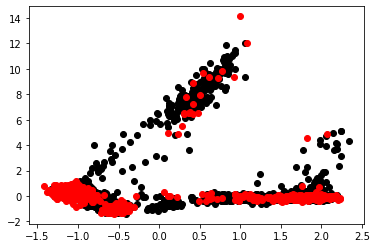

In [10]:
plt.scatter(orig_values[:,0], orig_values[:,1], c="k")
plt.scatter(new_values[:,0], new_values[:,1], c="r");